In [1]:
import torch
import torchvision

In [3]:
batch_size = 128

In [4]:
data_directory_path = '../data/'

mnist_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Training data loader
train_dataset = torchvision.datasets.MNIST(
    root=data_directory_path, train=True, download=True, transform=mnist_transforms
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

# Validation data loader
valid_dataset = torchvision.datasets.MNIST(
    root=data_directory_path, train=False, download=True, transform=mnist_transforms
)

valid_loader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=len(valid_dataset), shuffle=True
)

In [14]:
def mini_batch_sgd(weights_init_func=None):

    num_epochs = 4
    learning_rate = 0.1
    
    nx = 28 * 28
    ny = 10
    shapes = (nx, 20, 20, 20, ny)

    layers = [
        torch.nn.Sequential(torch.nn.Linear(n_in, n_out), torch.nn.BatchNorm1d(n_out), torch.nn.ReLU())
        for n_in, n_out in zip(shapes, shapes[1:-1])
    ]
    
    layers.append(torch.nn.Linear(shapes[-2], shapes[-1]))

    model = torch.nn.Sequential(*layers)

    if weights_init_func:
        model.apply(weights_init_func)

    loss = torch.nn.CrossEntropyLoss()
    
    train_costs = []
    accuracies = []

    for epoch in range(num_epochs):

        # Set model to training mode
        model.train()

        # Update the model for each batch
        train_count = 0
        train_cost = 0
        for X, y in train_loader:

            # Compute model cost
            yhat = model(X.view(-1, nx))
            cost = loss(yhat, y)

            # Compute gradients
            model.zero_grad()
            cost.backward()

            # Update parameters
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad

            train_count += X.shape[0]
            train_cost += cost.item()
            
            train_costs.append(cost.item())

        # Set model to evaluation mode
        model.eval()

        # Test model on validation data
        valid_count = 0
        valid_cost = 0
        valid_correct = 0
        with torch.no_grad():
            for X, y in valid_loader:

                # Compute model cost
                yhat = model(X.view(-1, nx))
                cost = loss(yhat, y)

                # Convert model output into discrete predictions
                predictions = yhat.argmax(dim=1, keepdim=True)

                # Compute number correct
                correct = predictions.eq(y.view_as(predictions)).double().sum().item()

                valid_count += X.shape[0]
                valid_cost += cost.item()
                valid_correct += correct

        train_cost /= train_count
        valid_cost /= valid_count
        valid_accuracy = valid_correct / valid_count

        ep_str = f"{epoch+1:>2}/{num_epochs}"
        tc_str = f"{train_cost:.2e}"
        vc_str = f"{valid_cost:.2e}"
        va_str = f"{valid_accuracy*100:.2f}"
        print(f"{ep_str}: TC={tc_str}, VC={vc_str}, Accuracy={va_str}%")
        
        accuracies.append(valid_accuracy)

    print("Done.")
    
    return train_costs, accuracies

In [6]:
train_costs_comp = {}
accuracy_comp = {}

In [15]:
trial_name = "BatchNorm"

def init_weights(layer):
    if type(layer) == torch.nn.Linear:
        print("Initializing", layer)
        #layer.weight.data.fill_(0.0)
        #layer.weight.data.fill_(1.0)
        #layer.weight.data.uniform_()
        #.weight.data.normal_
        #torch.nn.init.xavier_uniform_(layer.weight)
        torch.nn.init.kaiming_normal_(layer.weight)
        layer.bias.data.fill_(0.0)

# train_costs_comp[trial_name], accuracy_comp[trial_name] = mini_batch_sgd(init_weights)
train_costs_comp[trial_name], accuracy_comp[trial_name] = mini_batch_sgd()

 1/4: TC=3.21e-03, VC=1.78e-05, Accuracy=94.78%
 2/4: TC=1.43e-03, VC=1.50e-05, Accuracy=95.51%
 3/4: TC=1.19e-03, VC=1.37e-05, Accuracy=95.66%
 4/4: TC=1.07e-03, VC=1.23e-05, Accuracy=96.28%
Done.


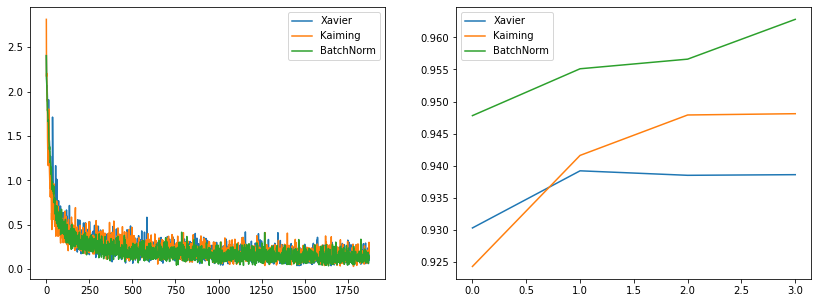

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for name, data in train_costs_comp.items():
    if name in ["Zeros", "Uniform01"]: continue
    axes[0].plot(data, label=name)

for name, data in accuracy_comp.items():
    if name in ["Zeros", "Uniform01"]: continue
    axes[1].plot(data, label=name)

axes[0].legend();
axes[1].legend();

In [84]:
def mini_batch_sgd(weights_init_func=None):

    batch_size = 128
    num_epochs = 40
    learning_rate = 0.1
    
    nx = 28 * 28
    ny = 10
    shapes = (nx, 20, 20, 20, ny)

    layers = [
        torch.nn.Sequential(torch.nn.Linear(n_in, n_out), torch.nn.BatchNorm1d(n_out), torch.nn.ReLU())
        for n_in, n_out in zip(shapes, shapes[1:-1])
    ]
    
    layers.append(torch.nn.Linear(shapes[-2], shapes[-1]))

    model = torch.nn.Sequential(*layers)

    if weights_init_func:
        model.apply(weights_init_func)

    loss = torch.nn.CrossEntropyLoss()
    
    train_costs = []
    accuracies = []

    for epoch in range(num_epochs):

        # Set model to training mode
        model.train()

        # Update the model for each batch
        train_count = 0
        train_cost = 0
        for X, y in train_loader:

            # Compute model cost
            yhat = model(X.view(-1, nx))
            cost = loss(yhat, y)

            # Compute gradients
            model.zero_grad()
            cost.backward()

            # Update parameters
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad

            train_count += X.shape[0]
            train_cost += cost.item()
            
            train_costs.append(cost.item())

        # Set model to evaluation mode
        model.eval()

        # Test model on validation data
        valid_count = 0
        valid_cost = 0
        valid_correct = 0
        with torch.no_grad():
            for X, y in valid_loader:

                # Compute model cost
                yhat = model(X.view(-1, nx))
                cost = loss(yhat, y)

                # Convert model output into discrete predictions
                predictions = yhat.argmax(dim=1, keepdim=True)

                # Compute number correct
                correct = predictions.eq(y.view_as(predictions)).double().sum().item()

                valid_count += X.shape[0]
                valid_cost += cost.item()
                valid_correct += correct

        train_cost /= train_count
        valid_cost /= valid_count
        valid_accuracy = valid_correct / valid_count

        ep_str = f"{epoch+1:>2}/{num_epochs}"
        tc_str = f"{train_cost:.2e}"
        vc_str = f"{valid_cost:.2e}"
        va_str = f"{valid_accuracy*100:.2f}"
        print(f"{ep_str}: TC={tc_str}, VC={vc_str}, Accuracy={va_str}%")
        
        accuracies.append(valid_accuracy)

    print("Done.")
    
    return train_costs, accuracies

In [85]:
mini_batch_sgd()

 1/40: TC=3.36e-03, VC=1.99e-05, Accuracy=94.01%
 2/40: TC=1.50e-03, VC=1.68e-05, Accuracy=94.93%
 3/40: TC=1.25e-03, VC=1.41e-05, Accuracy=95.75%
 4/40: TC=1.09e-03, VC=1.37e-05, Accuracy=95.65%
 5/40: TC=1.01e-03, VC=1.23e-05, Accuracy=96.12%
 6/40: TC=9.39e-04, VC=1.16e-05, Accuracy=96.40%
 7/40: TC=8.75e-04, VC=1.14e-05, Accuracy=96.36%
 8/40: TC=8.22e-04, VC=1.16e-05, Accuracy=96.42%
 9/40: TC=7.97e-04, VC=1.16e-05, Accuracy=96.45%
10/40: TC=7.59e-04, VC=1.13e-05, Accuracy=96.40%
11/40: TC=7.21e-04, VC=1.08e-05, Accuracy=96.60%
12/40: TC=7.10e-04, VC=1.09e-05, Accuracy=96.52%
13/40: TC=6.84e-04, VC=1.16e-05, Accuracy=96.42%
14/40: TC=6.67e-04, VC=1.07e-05, Accuracy=96.61%
15/40: TC=6.48e-04, VC=1.05e-05, Accuracy=96.54%
16/40: TC=6.34e-04, VC=1.09e-05, Accuracy=96.68%
17/40: TC=6.37e-04, VC=1.14e-05, Accuracy=96.48%
18/40: TC=6.03e-04, VC=1.05e-05, Accuracy=96.79%
19/40: TC=5.99e-04, VC=1.13e-05, Accuracy=96.52%
20/40: TC=5.83e-04, VC=1.04e-05, Accuracy=96.78%
21/40: TC=5.78e-04, 

([2.4443681240081787,
  2.256298303604126,
  2.1655726432800293,
  2.114485740661621,
  2.0264461040496826,
  2.017937421798706,
  1.903161883354187,
  1.8296196460723877,
  1.8479721546173096,
  1.8077064752578735,
  1.7776380777359009,
  1.697970986366272,
  1.6695982217788696,
  1.6224491596221924,
  1.5664938688278198,
  1.5199388265609741,
  1.5824733972549438,
  1.532850742340088,
  1.427551031112671,
  1.3990936279296875,
  1.349627137184143,
  1.305511236190796,
  1.2937324047088623,
  1.343979001045227,
  1.2527735233306885,
  1.2951463460922241,
  1.1831079721450806,
  1.187334418296814,
  1.1901968717575073,
  1.1351640224456787,
  1.1126514673233032,
  1.1500381231307983,
  1.1450812816619873,
  1.0065410137176514,
  0.9802561402320862,
  0.9655786752700806,
  1.0181093215942383,
  0.9495114088058472,
  0.9803721308708191,
  0.9058238863945007,
  0.852446436882019,
  0.8319464325904846,
  0.8555973172187805,
  0.8740977048873901,
  0.7841947078704834,
  0.9318854212760925,
